In [1]:
import pandas as pd

In [2]:
file_path = 'User_scores_nonPII2.0.csv'
data = pd.read_csv(file_path)
data2 = pd.read_csv(file_path)

In [3]:
num_columns = len(data.columns)
print(f'The number of columns in the CSV file is: {num_columns}')

The number of columns in the CSV file is: 67


In [4]:
print(data.head)

<bound method NDFrame.head of                           Timestamp  \
0    2019/03/20 3:59:08 AM GMT+5:30   
1    2019/03/20 4:06:03 AM GMT+5:30   
2    2019/03/20 4:15:15 AM GMT+5:30   
3    2019/03/20 4:15:38 AM GMT+5:30   
4    2019/03/20 4:16:19 AM GMT+5:30   
..                              ...   
536  2019/05/06 4:42:32 PM GMT+5:30   
537  2019/05/22 8:12:15 PM GMT+5:30   
538  2019/05/24 2:18:59 AM GMT+5:30   
539  2019/05/29 2:47:46 PM GMT+5:30   
540  2019/06/06 2:36:20 AM GMT+5:30   

    Please read the consent form and select I agree to continue  \
0                                              I Agree            
1                                              I Agree            
2                                              I Agree            
3                                              I Agree            
4                                              I Agree            
..                                                 ...            
536                             

In [5]:
columns_to_remove = ['Timestamp', 'Please read the consent form and select I agree to continue', 'UserId']
data2 = data2.drop(columns=columns_to_remove)
print(data2.head())

   Gender   Age What is the highest level of education you have completed?   \
0    Male  32.0                                    Master's degree            
1    Male  29.0                                    Master's degree            
2    Male  26.0                                  Bachelor's degree            
3    Male  26.0                                  Bachelor's degree            
4  Female  35.0                                    Master's degree            

      Nationality Your interest in music?  \
0           Chile            Enthusiastic   
1  United Kingdom            Enthusiastic   
2  United Kingdom            Enthusiastic   
3   United States            Enthusiastic   
4   United States            Enthusiastic   

  Have you had formal training or education related to music?  \
0                                                 No            
1                                                 No            
2                                                 No       

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [7]:
import joblib
label_encoder = LabelEncoder()
# Convert the 'Gender' column to numeric values
data2['Gender'] = label_encoder.fit_transform(data2['Gender'])
# Checking if updated
print(data2[['Gender']].head())
joblib.dump(label_encoder, 'label_encoder_gender.pkl')

   Gender
0       1
1       1
2       1
3       1
4       0


['label_encoder_gender.pkl']

In [8]:
data2

,Gender,Age,What is the highest level of education you have completed?,Nationality,Your interest in music?,Have you had formal training or education related to music?,"If yes, which instrument (or singing) and for how many years?",How many hours in a day do you listen to music?,What kind of music do you like to listen to the most?,What kind of music do you like to listen to when you feel low?,...,How has your music use pattern changed over the past one year?,How would you compare your well-being one year ago and now?,Unhealthy,Healthy,K-10,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism
0,1,32.0,Master's degree,Chile,Enthusiastic,No,NaN,8.0,Rock,rock,...,Not much has changed this last 12 months,I feel more or less the same.,13,20,14,3.75,3.50,2.50,3.50,2.00
1,1,29.0,Master's degree,United Kingdom,Enthusiastic,No,NaN,8.0,Pop,Pop,...,Started listening to more podcasts in place of...,I feel more or less the same.,13,20,25,4.50,4.00,2.50,4.00,3.75
2,1,26.0,Bachelor's degree,United Kingdom,Enthusiastic,No,NaN,5.0,pop,classical,...,Varied a bit over time,I feel better now,9,15,31,4.75,2.50,1.25,5.00,5.00
3,1,26.0,Bachelor's degree,United States,Enthusiastic,No,NaN,8.0,Rock,rock,...,"Yes, I change genres often.",I feel better now,16,19,18,4.75,2.00,2.50,2.25,3.50
4,0,35.0,Master's degree,United States,Enthusiastic,No,NaN,12.0,Rock,rock,...,"Not really, still listen a lot at work and I w...",I feel more or less the same.,12,23,17,3.50,2.75,3.25,4.25,1.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,1,43.0,Bachelor's degree,Australia,Enthusiastic,Yes,"Cello, 3 years",10.0,Mixed,Mixed,...,Listen to more music,I feel better now,11,17,13,4.50,3.75,3.50,4.50,2.25
537,1,24.0,Professional degree,India,Enthusiastic,No,NaN,2.0,Rock,rock,...,More focused listening,I feel more or less the same.,15,19,33,4.75,3.00,2.25,4.00,4.00
538,1,29.0,Master's degree,Poland,Enthusiastic,No,NaN,10.0,jazz,rock,...,I listen to more playlists than full albums ma...,I feel better now,27,21,25,4.50,4.25,1.75,2.75,3.25
539,2,99.0,Master's degree,Isle of Man,Enthusiastic,No,NaN,2.0,Mixed,Mixed,...,has not,I feel more or less the same.,10,16,12,4.00,3.75,3.00,3.50,2.75


In [9]:
from sklearn.preprocessing import OrdinalEncoder
education_order = [
    "High School graduate", 
    "Bachelor's degree", 
    "Master's degree", 
    "Professional degree"
]
ordinal_encoder = OrdinalEncoder(categories=[education_order])
data2['What is the highest level of education you have completed? '] = ordinal_encoder.fit_transform(
    data2[['What is the highest level of education you have completed? ']]
)

joblib.dump(ordinal_encoder, 'ordinal_encoder_education.pkl')
print(data2[['What is the highest level of education you have completed? ']].head())


   What is the highest level of education you have completed? 
0                                                2.0          
1                                                2.0          
2                                                1.0          
3                                                1.0          
4                                                2.0          


In [10]:
data2

,Gender,Age,What is the highest level of education you have completed?,Nationality,Your interest in music?,Have you had formal training or education related to music?,"If yes, which instrument (or singing) and for how many years?",How many hours in a day do you listen to music?,What kind of music do you like to listen to the most?,What kind of music do you like to listen to when you feel low?,...,How has your music use pattern changed over the past one year?,How would you compare your well-being one year ago and now?,Unhealthy,Healthy,K-10,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism
0,1,32.0,2.0,Chile,Enthusiastic,No,NaN,8.0,Rock,rock,...,Not much has changed this last 12 months,I feel more or less the same.,13,20,14,3.75,3.50,2.50,3.50,2.00
1,1,29.0,2.0,United Kingdom,Enthusiastic,No,NaN,8.0,Pop,Pop,...,Started listening to more podcasts in place of...,I feel more or less the same.,13,20,25,4.50,4.00,2.50,4.00,3.75
2,1,26.0,1.0,United Kingdom,Enthusiastic,No,NaN,5.0,pop,classical,...,Varied a bit over time,I feel better now,9,15,31,4.75,2.50,1.25,5.00,5.00
3,1,26.0,1.0,United States,Enthusiastic,No,NaN,8.0,Rock,rock,...,"Yes, I change genres often.",I feel better now,16,19,18,4.75,2.00,2.50,2.25,3.50
4,0,35.0,2.0,United States,Enthusiastic,No,NaN,12.0,Rock,rock,...,"Not really, still listen a lot at work and I w...",I feel more or less the same.,12,23,17,3.50,2.75,3.25,4.25,1.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,1,43.0,1.0,Australia,Enthusiastic,Yes,"Cello, 3 years",10.0,Mixed,Mixed,...,Listen to more music,I feel better now,11,17,13,4.50,3.75,3.50,4.50,2.25
537,1,24.0,3.0,India,Enthusiastic,No,NaN,2.0,Rock,rock,...,More focused listening,I feel more or less the same.,15,19,33,4.75,3.00,2.25,4.00,4.00
538,1,29.0,2.0,Poland,Enthusiastic,No,NaN,10.0,jazz,rock,...,I listen to more playlists than full albums ma...,I feel better now,27,21,25,4.50,4.25,1.75,2.75,3.25
539,2,99.0,2.0,Isle of Man,Enthusiastic,No,NaN,2.0,Mixed,Mixed,...,has not,I feel more or less the same.,10,16,12,4.00,3.75,3.00,3.50,2.75


In [11]:
#Nationality column
label_encoder = LabelEncoder()
data2['Nationality'] = label_encoder.fit_transform(data2['Nationality'])


joblib.dump(label_encoder, 'label_encoder_nationality.pkl')
print(data2[['Nationality']].head())

   Nationality
0           10
1           58
2           58
3           59
4           59


In [12]:
#Your interest in music? column
interest_order = [['Least bothered', 'Moderate', 'Enthusiastic']]

ordinal_encoder = OrdinalEncoder(categories=interest_order)

data2['Your interest in music?'] = ordinal_encoder.fit_transform(data2[['Your interest in music?']])

joblib.dump(ordinal_encoder, 'ordinal_encoder_interest_music.pkl')

print(data2[['Your interest in music?']].head())

   Your interest in music?
0                      2.0
1                      2.0
2                      2.0
3                      2.0
4                      2.0


In [13]:
#Have you had formal training or education related to music? column
data2['Have you had formal training or education related to music?'] = label_encoder.fit_transform(data2['Have you had formal training or education related to music?'])

joblib.dump(label_encoder, 'label_encoder_music_training.pkl')

print(data2[['Have you had formal training or education related to music?']].head())

   Have you had formal training or education related to music?
0                                                  0          
1                                                  0          
2                                                  0          
3                                                  0          
4                                                  0          


In [14]:
#Drop column If yes, which instrument (or singing) and for how many years?
data2 = data2.drop(columns=['If yes, which instrument (or singing) and for how many years?'])
print(data2.head())

   Gender   Age  What is the highest level of education you have completed?   \
0       1  32.0                                                2.0             
1       1  29.0                                                2.0             
2       1  26.0                                                1.0             
3       1  26.0                                                1.0             
4       0  35.0                                                2.0             

   Nationality  Your interest in music?  \
0           10                      2.0   
1           58                      2.0   
2           58                      2.0   
3           59                      2.0   
4           59                      2.0   

   Have you had formal training or education related to music?  \
0                                                  0             
1                                                  0             
2                                                  0          

In [15]:
#Do you listen to music in the background while working? [Choice] Column
background_music_order = ['Never', 'Rarely', 'Sometimes', 'Often', 'Always']
ordinal_encoder = OrdinalEncoder(categories=[background_music_order])
data2['Do you listen to music in the background while working? [Choice]'] = ordinal_encoder.fit_transform(data2[['Do you listen to music in the background while working? [Choice]']])

joblib.dump(ordinal_encoder, 'ordinal_encoder_background_music.pkl')

print(data2[['Do you listen to music in the background while working? [Choice]']].head())

   Do you listen to music in the background while working? [Choice]
0                                                4.0               
1                                                4.0               
2                                                3.0               
3                                                4.0               
4                                                4.0               


In [16]:
common_order1 = ['Never', 'Rarely', 'Sometimes', 'Often', 'Always']
ordinal_encoder = OrdinalEncoder(categories=[common_order1])
data2['When I listen to music I get stuck in bad memories [Choice]'] = ordinal_encoder.fit_transform(data2[['When I listen to music I get stuck in bad memories [Choice]']])
joblib.dump(ordinal_encoder, 'bad_memories.pkl')

common_order2 = ['Never', 'Rarely', 'Sometimes', 'Often', 'Always']
ordinal_encoder = OrdinalEncoder(categories=[common_order2])
data2['I hide in my music because nobody understands me, and it blocks people out [Choice]'] = ordinal_encoder.fit_transform(data2[['I hide in my music because nobody understands me, and it blocks people out [Choice]']])
joblib.dump(ordinal_encoder, 'hide_music.pkl')


common_order3 = ['Never', 'Rarely', 'Sometimes', 'Often', 'Always']
ordinal_encoder = OrdinalEncoder(categories=[common_order3])
data2['Music helps me relax [Choice]'] = ordinal_encoder.fit_transform(data2[['Music helps me relax [Choice]']])
joblib.dump(ordinal_encoder, 'music_relax.pkl')

common_order4 = ['Never', 'Rarely', 'Sometimes', 'Often', 'Always']
ordinal_encoder = OrdinalEncoder(categories=[common_order4])
data2['When I try to use music to feel better I actually end up feeling worse [Choice]'] = ordinal_encoder.fit_transform(data2[['When I try to use music to feel better I actually end up feeling worse [Choice]']])
joblib.dump(ordinal_encoder, 'music_feel_worse.pkl')

common_order5 = ['Never', 'Rarely', 'Sometimes', 'Often', 'Always']
ordinal_encoder = OrdinalEncoder(categories=[common_order5])
data2['I feel happier after playing or listening to music [Choice]'] = ordinal_encoder.fit_transform(data2[['I feel happier after playing or listening to music [Choice]']])
joblib.dump(ordinal_encoder, 'feel_happier.pkl')

common_order6 = ['Never', 'Rarely', 'Sometimes', 'Often', 'Always']
ordinal_encoder = OrdinalEncoder(categories=[common_order6])
data2['Music gives me the energy to get going [Choice]'] = ordinal_encoder.fit_transform(data2[['Music gives me the energy to get going [Choice]']])
joblib.dump(ordinal_encoder, 'energy_getting.pkl')

common_order7 = ['Never', 'Rarely', 'Sometimes', 'Often', 'Always']
ordinal_encoder = OrdinalEncoder(categories=[common_order7])
data2['I like to listen to songs over and over even though it makes me feel worse [Choice]'] = ordinal_encoder.fit_transform(data2[['I like to listen to songs over and over even though it makes me feel worse [Choice]']])
joblib.dump(ordinal_encoder, 'listen_over_over.pkl')

common_order8 = ['Never', 'Rarely', 'Sometimes', 'Often', 'Always']
ordinal_encoder = OrdinalEncoder(categories=[common_order8])
data2['Music makes me feel bad about who I am [Choice]'] = ordinal_encoder.fit_transform(data2[['Music makes me feel bad about who I am [Choice]']])
joblib.dump(ordinal_encoder, 'feel_bad.pkl')

common_order9 = ['Never', 'Rarely', 'Sometimes', 'Often', 'Always']
ordinal_encoder = OrdinalEncoder(categories=[common_order9])
data2['Music helps me to connect with other people who are like me [Choice]'] = ordinal_encoder.fit_transform(data2[['Music helps me to connect with other people who are like me [Choice]']])
joblib.dump(ordinal_encoder, 'connect_people.pkl')

common_order10 = ['Never', 'Rarely', 'Sometimes', 'Often', 'Always']
ordinal_encoder = OrdinalEncoder(categories=[common_order10])
data2['Music gives me an excuse not to face up to the real world [Choice]'] = ordinal_encoder.fit_transform(data2[['Music gives me an excuse not to face up to the real world [Choice]']])
joblib.dump(ordinal_encoder, 'excuse_music.pkl')

common_order11 = ['Never', 'Rarely', 'Sometimes', 'Often', 'Always']
ordinal_encoder = OrdinalEncoder(categories=[common_order11])
data2['It can be hard to stop listening to music that connects me to bad memories [Choice]'] = ordinal_encoder.fit_transform(data2[['It can be hard to stop listening to music that connects me to bad memories [Choice]']])
joblib.dump(ordinal_encoder, 'stop_bad_memories.pkl')

common_order12 = ['Never', 'Rarely', 'Sometimes', 'Often', 'Always']
ordinal_encoder = OrdinalEncoder(categories=[common_order12])
data2['Music leads me to do things I shouldn’t do [Choice]'] = ordinal_encoder.fit_transform(data2[['Music leads me to do things I shouldn’t do [Choice]']])
joblib.dump(ordinal_encoder, 'shouldnt_do.pkl')

common_order13 = ['Never', 'Rarely', 'Sometimes', 'Often', 'Always']
ordinal_encoder = OrdinalEncoder(categories=[common_order13])
data2['When I’m feeling tense or tired in my body music helps me relax [Choice]'] = ordinal_encoder.fit_transform(data2[['When I’m feeling tense or tired in my body music helps me relax [Choice]']])
joblib.dump(ordinal_encoder, 'tense_music_relax.pkl')

print(data2['Music gives me the energy to get going [Choice]'])

0      4.0
1      3.0
2      4.0
3      4.0
4      4.0
      ... 
536    2.0
537    3.0
538    4.0
539    3.0
540    2.0
Name: Music gives me the energy to get going [Choice], Length: 541, dtype: float64


In [17]:
#In the past 4 weeks, how often did you feel tired out for no good reason?  [Choice] column
tired_out_order = ['None of the time', 'A little of the time', 'Some of the time', 'Most of the time', 'All of the time']
ordinal_encoder = OrdinalEncoder(categories=[tired_out_order])
column_to_encode = 'In the past 4 weeks, how often did you feel tired out for no good reason?  [Choice]'
data2[column_to_encode] = ordinal_encoder.fit_transform(data2[[column_to_encode]])


joblib.dump(ordinal_encoder, 'ordinal_encoder_tired_out.pkl')

print(data2[[column_to_encode]].head())

   In the past 4 weeks, how often did you feel tired out for no good reason?  [Choice]
0                                                1.0                                  
1                                                2.0                                  
2                                                2.0                                  
3                                                2.0                                  
4                                                0.0                                  


In [18]:
tired_out_order1 = ['None of the time', 'A little of the time', 'Some of the time', 'Most of the time', 'All of the time']
ordinal_encoder = OrdinalEncoder(categories=[tired_out_order1])
column_to_encode = 'In the past 4 weeks, how often did you feel nervous? [Choice]'
data2[column_to_encode] = ordinal_encoder.fit_transform(data2[[column_to_encode]])
joblib.dump(ordinal_encoder, '4weeks_often_nervous.pkl')


tired_out_order2 = ['None of the time', 'A little of the time', 'Some of the time', 'Most of the time', 'All of the time']
ordinal_encoder = OrdinalEncoder(categories=[tired_out_order1])
column_to_encode =  'In the past 4 weeks, how often did you feel so nervous that nothing could calm you down?     [Choice]'
data2[column_to_encode] = ordinal_encoder.fit_transform(data2[[column_to_encode]])
joblib.dump(ordinal_encoder, '4weeks_often_nervous_calmdown.pkl')


tired_out_order3 = ['None of the time', 'A little of the time', 'Some of the time', 'Most of the time', 'All of the time']
ordinal_encoder = OrdinalEncoder(categories=[tired_out_order1])
column_to_encode =  'In the past 4 weeks, how often did you feel hopeless? [Choice]'
data2[column_to_encode] = ordinal_encoder.fit_transform(data2[[column_to_encode]])
joblib.dump(ordinal_encoder, '4weeks_often_hopeless.pkl')

tired_out_order4 = ['None of the time', 'A little of the time', 'Some of the time', 'Most of the time', 'All of the time']
ordinal_encoder = OrdinalEncoder(categories=[tired_out_order4])
column_to_encode = 'In the past 4 weeks, how often did you feel restless or fidgety?  [Choice]'
data2[column_to_encode] = ordinal_encoder.fit_transform(data2[[column_to_encode]])
joblib.dump(ordinal_encoder, '4weeks_often_restless.pkl')

tired_out_order5 = ['None of the time', 'A little of the time', 'Some of the time', 'Most of the time', 'All of the time']
ordinal_encoder = OrdinalEncoder(categories=[tired_out_order5])
column_to_encode = 'In the past 4 weeks, how often did you feel so restless you could not sit still?  [Choice]'
data2[column_to_encode] = ordinal_encoder.fit_transform(data2[[column_to_encode]])
joblib.dump(ordinal_encoder, '4weeks_often_restless_notstill.pkl')

tired_out_order6 = ['None of the time', 'A little of the time', 'Some of the time', 'Most of the time', 'All of the time']
ordinal_encoder = OrdinalEncoder(categories=[tired_out_order6])
column_to_encode = 'In the past 4 weeks, how often did you feel depressed? [Choice]'
data2[column_to_encode] = ordinal_encoder.fit_transform(data2[[column_to_encode]])
joblib.dump(ordinal_encoder, '4weeks_often_depressed.pkl')

tired_out_order7 = ['None of the time', 'A little of the time', 'Some of the time', 'Most of the time', 'All of the time']
ordinal_encoder = OrdinalEncoder(categories=[tired_out_order7])
column_to_encode = 'In the past 4 weeks, how often did you feel that everything was an effort?  [Choice]'
data2[column_to_encode] = ordinal_encoder.fit_transform(data2[[column_to_encode]])
joblib.dump(ordinal_encoder, '4weeks_often_effort.pkl')

tired_out_order8 = ['None of the time', 'A little of the time', 'Some of the time', 'Most of the time', 'All of the time']
ordinal_encoder = OrdinalEncoder(categories=[tired_out_order8])
column_to_encode = 'In the past 4 weeks, how often did you feel so sad that nothing could cheer you up? [Choice]'
data2[column_to_encode] = ordinal_encoder.fit_transform(data2[[column_to_encode]])
joblib.dump(ordinal_encoder, '4weeks_often_sad.pkl')

tired_out_order9 = ['None of the time', 'A little of the time', 'Some of the time', 'Most of the time', 'All of the time']
ordinal_encoder = OrdinalEncoder(categories=[tired_out_order9])
column_to_encode = 'In the past 4 weeks, how often did you feel worthless? [Choice]'
data2[column_to_encode] = ordinal_encoder.fit_transform(data2[[column_to_encode]])
joblib.dump(ordinal_encoder, '4weeks_often_worthless.pkl')


print(data2['In the past 4 weeks, how often did you feel worthless? [Choice]'])

0      0.0
1      2.0
2      2.0
3      0.0
4      0.0
      ... 
536    0.0
537    2.0
538    1.0
539    0.0
540    1.0
Name: In the past 4 weeks, how often did you feel worthless? [Choice], Length: 541, dtype: float64


In [19]:
#Am the life of the party. [Choice] column
life_of_party_order = ['Strongly Disagree', 'Somewhat Disagree', 'Neither Agree nor Disagree', 'Somewhat Agree', 'Strongly Agree']
ordinal_encoder = OrdinalEncoder(categories=[life_of_party_order])
data2['Am the life of the party. [Choice]'] = ordinal_encoder.fit_transform(data2[['Am the life of the party. [Choice]']])

joblib.dump(ordinal_encoder, 'ordinal_encoder_life_of_party.pkl')

print(data2[['Am the life of the party. [Choice]']].head())

   Am the life of the party. [Choice]
0                                 2.0
1                                 1.0
2                                 1.0
3                                 1.0
4                                 2.0


In [20]:
agreement_order1 = ['Strongly Disagree', 'Somewhat Disagree', 'Neither Agree nor Disagree', 'Somewhat Agree', 'Strongly Agree']
ordinal_encoder = OrdinalEncoder(categories=[agreement_order1])
column_to_encode = 'Sympathize with others’ feelings. [Choice]'
data2[column_to_encode] = ordinal_encoder.fit_transform(data2[[column_to_encode]])
joblib.dump(ordinal_encoder, 'sympathize_with_others.pkl')


agreement_order2 = ['Strongly Disagree', 'Somewhat Disagree', 'Neither Agree nor Disagree', 'Somewhat Agree', 'Strongly Agree']
ordinal_encoder = OrdinalEncoder(categories=[agreement_order2])
column_to_encode = 'Get chores done right away.  [Choice]'
data2[column_to_encode] = ordinal_encoder.fit_transform(data2[[column_to_encode]])
joblib.dump(ordinal_encoder, 'get_chores_done.pkl')

agreement_order3 = ['Strongly Disagree', 'Somewhat Disagree', 'Neither Agree nor Disagree', 'Somewhat Agree', 'Strongly Agree']
ordinal_encoder = OrdinalEncoder(categories=[agreement_order3])
column_to_encode = 'Have frequent mood swings. [Choice]'
data2[column_to_encode] = ordinal_encoder.fit_transform(data2[[column_to_encode]])
joblib.dump(ordinal_encoder, 'frequent_mood_swings.pkl')

agreement_order4 = ['Strongly Disagree', 'Somewhat Disagree', 'Neither Agree nor Disagree', 'Somewhat Agree', 'Strongly Agree']
ordinal_encoder = OrdinalEncoder(categories=[agreement_order4])
column_to_encode = 'Have a vivid imagination. [Choice]'
data2[column_to_encode] = ordinal_encoder.fit_transform(data2[[column_to_encode]])
joblib.dump(ordinal_encoder, 'vivid_imagination.pkl')

agreement_order5 = ['Strongly Disagree', 'Somewhat Disagree', 'Neither Agree nor Disagree', 'Somewhat Agree', 'Strongly Agree']
ordinal_encoder = OrdinalEncoder(categories=[agreement_order5])
column_to_encode = 'Don’t talk a lot. [Choice]'
data2[column_to_encode] = ordinal_encoder.fit_transform(data2[[column_to_encode]])
joblib.dump(ordinal_encoder, 'dont_talk_a_lot.pkl')

agreement_order6 = ['Strongly Disagree', 'Somewhat Disagree', 'Neither Agree nor Disagree', 'Somewhat Agree', 'Strongly Agree']
ordinal_encoder = OrdinalEncoder(categories=[agreement_order6])
column_to_encode = 'Am not interested in other people’s problems. [Choice]'
data2[column_to_encode] = ordinal_encoder.fit_transform(data2[[column_to_encode]])
joblib.dump(ordinal_encoder, 'not_interested_in_problems.pkl')

agreement_order7 = ['Strongly Disagree', 'Somewhat Disagree', 'Neither Agree nor Disagree', 'Somewhat Agree', 'Strongly Agree']
ordinal_encoder = OrdinalEncoder(categories=[agreement_order7])
column_to_encode = 'Often forget to put things back in their proper place. [Choice]'
data2[column_to_encode] = ordinal_encoder.fit_transform(data2[[column_to_encode]])
joblib.dump(ordinal_encoder, 'forget_putting_things_back.pkl')

agreement_order8 = ['Strongly Disagree', 'Somewhat Disagree', 'Neither Agree nor Disagree', 'Somewhat Agree', 'Strongly Agree']
ordinal_encoder = OrdinalEncoder(categories=[agreement_order8])
column_to_encode = 'Am relaxed most of the time. [Choice]'
data2[column_to_encode] = ordinal_encoder.fit_transform(data2[[column_to_encode]])
joblib.dump(ordinal_encoder, 'relaxed_most_of_the_time.pkl')

agreement_order9 = ['Strongly Disagree', 'Somewhat Disagree', 'Neither Agree nor Disagree', 'Somewhat Agree', 'Strongly Agree']
ordinal_encoder = OrdinalEncoder(categories=[agreement_order9])
column_to_encode = 'Am not interested in abstract ideas. [Choice]'
data2[column_to_encode] = ordinal_encoder.fit_transform(data2[[column_to_encode]])
joblib.dump(ordinal_encoder, 'not_interested_in_abstract_ideas.pkl')

agreement_order10 = ['Strongly Disagree', 'Somewhat Disagree', 'Neither Agree nor Disagree', 'Somewhat Agree', 'Strongly Agree']
ordinal_encoder = OrdinalEncoder(categories=[agreement_order10])
column_to_encode = 'Talk to a lot of different people at parties. [Choice]'
data2[column_to_encode] = ordinal_encoder.fit_transform(data2[[column_to_encode]])
joblib.dump(ordinal_encoder, 'talk_to_people_at_parties.pkl')

agreement_order11 = ['Strongly Disagree', 'Somewhat Disagree', 'Neither Agree nor Disagree', 'Somewhat Agree', 'Strongly Agree']
ordinal_encoder = OrdinalEncoder(categories=[agreement_order11])
column_to_encode = 'Feel others’ emotions. [Choice]'
data2[column_to_encode] = ordinal_encoder.fit_transform(data2[[column_to_encode]])
joblib.dump(ordinal_encoder, 'feel_others_emotions.pkl')

agreement_order12 = ['Strongly Disagree', 'Somewhat Disagree', 'Neither Agree nor Disagree', 'Somewhat Agree', 'Strongly Agree']
ordinal_encoder = OrdinalEncoder(categories=[agreement_order12])
column_to_encode = 'Like order. [Choice]'
data2[column_to_encode] = ordinal_encoder.fit_transform(data2[[column_to_encode]])
joblib.dump(ordinal_encoder, 'like_order.pkl')

agreement_order13 = ['Strongly Disagree', 'Somewhat Disagree', 'Neither Agree nor Disagree', 'Somewhat Agree', 'Strongly Agree']
ordinal_encoder = OrdinalEncoder(categories=[agreement_order13])
column_to_encode = 'Get upset easily. [Choice]'
data2[column_to_encode] = ordinal_encoder.fit_transform(data2[[column_to_encode]])
joblib.dump(ordinal_encoder, 'get_upset_easily.pkl')

agreement_order14 = ['Strongly Disagree', 'Somewhat Disagree', 'Neither Agree nor Disagree', 'Somewhat Agree', 'Strongly Agree']
ordinal_encoder = OrdinalEncoder(categories=[agreement_order14])
column_to_encode = 'I Have difficulty understanding abstract ideas. [Choice]'
data2[column_to_encode] = ordinal_encoder.fit_transform(data2[[column_to_encode]])
joblib.dump(ordinal_encoder, 'difficulty_understanding_abstract_ideas.pkl')

agreement_order15 = ['Strongly Disagree', 'Somewhat Disagree', 'Neither Agree nor Disagree', 'Somewhat Agree', 'Strongly Agree']
ordinal_encoder = OrdinalEncoder(categories=[agreement_order15])
column_to_encode = 'Keep in the background. [Choice]'
data2[column_to_encode] = ordinal_encoder.fit_transform(data2[[column_to_encode]])
joblib.dump(ordinal_encoder, 'keep_in_background.pkl')

agreement_order16 = ['Strongly Disagree', 'Somewhat Disagree', 'Neither Agree nor Disagree', 'Somewhat Agree', 'Strongly Agree']
ordinal_encoder = OrdinalEncoder(categories=[agreement_order16])
column_to_encode = 'Am not really interested in others. [Choice]'
data2[column_to_encode] = ordinal_encoder.fit_transform(data2[[column_to_encode]])
joblib.dump(ordinal_encoder, 'not_interested_in_others.pkl')

agreement_order17 = ['Strongly Disagree', 'Somewhat Disagree', 'Neither Agree nor Disagree', 'Somewhat Agree', 'Strongly Agree']
ordinal_encoder = OrdinalEncoder(categories=[agreement_order17])
column_to_encode = 'Make a mess of things. [Choice]'
data2[column_to_encode] = ordinal_encoder.fit_transform(data2[[column_to_encode]])
joblib.dump(ordinal_encoder, 'make_mess_of_things.pkl')

agreement_order18 = ['Strongly Disagree', 'Somewhat Disagree', 'Neither Agree nor Disagree', 'Somewhat Agree', 'Strongly Agree']
ordinal_encoder = OrdinalEncoder(categories=[agreement_order18])
column_to_encode = 'Seldom feel blue. [Choice]'
data2[column_to_encode] = ordinal_encoder.fit_transform(data2[[column_to_encode]])
joblib.dump(ordinal_encoder, 'seldom_feel_blue.pkl')

agreement_order19 = ['Strongly Disagree', 'Somewhat Disagree', 'Neither Agree nor Disagree', 'Somewhat Agree', 'Strongly Agree']
ordinal_encoder = OrdinalEncoder(categories=[agreement_order19])
column_to_encode = 'Do not have a good imagination. [Choice]'
data2[column_to_encode] = ordinal_encoder.fit_transform(data2[[column_to_encode]])
joblib.dump(ordinal_encoder, 'not_good_imagination.pkl')

'''
    'Have frequent mood swings. [Choice]', 'Have a vivid imagination. [Choice]',
    'Don’t talk a lot. [Choice]', 'Am not interested in other people’s problems. [Choice]',
    'Often forget to put things back in their proper place. [Choice]', 'Am relaxed most of the time. [Choice]',
    'Am not interested in abstract ideas. [Choice]', 'Talk to a lot of different people at parties. [Choice]',
    'Feel others’ emotions. [Choice]', 'Like order. [Choice]',
    'Get upset easily. [Choice]', 'I Have difficulty understanding abstract ideas. [Choice]',
    'Keep in the background. [Choice]', 'Am not really interested in others. [Choice]',
    'Make a mess of things. [Choice]', 'Seldom feel blue. [Choice]',
    'Do not have a good imagination. [Choice]'
'''

print(data2['Seldom feel blue. [Choice]'])

0      2.0
1      1.0
2      0.0
3      2.0
4      3.0
      ... 
536    3.0
537    1.0
538    3.0
539    3.0
540    2.0
Name: Seldom feel blue. [Choice], Length: 541, dtype: float64


In [21]:
data2.head()

,Gender,Age,What is the highest level of education you have completed?,Nationality,Your interest in music?,Have you had formal training or education related to music?,How many hours in a day do you listen to music?,What kind of music do you like to listen to the most?,What kind of music do you like to listen to when you feel low?,Do you listen to music in the background while working? [Choice],...,How has your music use pattern changed over the past one year?,How would you compare your well-being one year ago and now?,Unhealthy,Healthy,K-10,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism
0,1,32.0,2.0,10,2.0,0,8.0,Rock,rock,4.0,...,Not much has changed this last 12 months,I feel more or less the same.,13,20,14,3.75,3.50,2.50,3.50,2.00
1,1,29.0,2.0,58,2.0,0,8.0,Pop,Pop,4.0,...,Started listening to more podcasts in place of...,I feel more or less the same.,13,20,25,4.50,4.00,2.50,4.00,3.75
2,1,26.0,1.0,58,2.0,0,5.0,pop,classical,3.0,...,Varied a bit over time,I feel better now,9,15,31,4.75,2.50,1.25,5.00,5.00
3,1,26.0,1.0,59,2.0,0,8.0,Rock,rock,4.0,...,"Yes, I change genres often.",I feel better now,16,19,18,4.75,2.00,2.50,2.25,3.50
4,0,35.0,2.0,59,2.0,0,12.0,Rock,rock,4.0,...,"Not really, still listen a lot at work and I w...",I feel more or less the same.,12,23,17,3.50,2.75,3.25,4.25,1.75


In [22]:
#How would you compare your well-being one year ago and now? column

well_being_order = ['I feel more or less the same.', 'I feel better now', "Can't say", 'I feel worse now']
ordinal_encoder = OrdinalEncoder(categories=[well_being_order])
column_to_encode = 'How would you compare your well-being one year ago and now?'
data2[column_to_encode] = ordinal_encoder.fit_transform(data2[[column_to_encode]])


joblib.dump(ordinal_encoder, 'ordinal_encoder_well_being.pkl')

print(data2[column_to_encode].head())

#print(data2['How would you compare your well-being one year ago and now?'].unique())


0    0.0
1    0.0
2    1.0
3    1.0
4    0.0
Name: How would you compare your well-being one year ago and now?, dtype: float64


In [23]:
data2.head()

,Gender,Age,What is the highest level of education you have completed?,Nationality,Your interest in music?,Have you had formal training or education related to music?,How many hours in a day do you listen to music?,What kind of music do you like to listen to the most?,What kind of music do you like to listen to when you feel low?,Do you listen to music in the background while working? [Choice],...,How has your music use pattern changed over the past one year?,How would you compare your well-being one year ago and now?,Unhealthy,Healthy,K-10,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism
0,1,32.0,2.0,10,2.0,0,8.0,Rock,rock,4.0,...,Not much has changed this last 12 months,0.0,13,20,14,3.75,3.50,2.50,3.50,2.00
1,1,29.0,2.0,58,2.0,0,8.0,Pop,Pop,4.0,...,Started listening to more podcasts in place of...,0.0,13,20,25,4.50,4.00,2.50,4.00,3.75
2,1,26.0,1.0,58,2.0,0,5.0,pop,classical,3.0,...,Varied a bit over time,1.0,9,15,31,4.75,2.50,1.25,5.00,5.00
3,1,26.0,1.0,59,2.0,0,8.0,Rock,rock,4.0,...,"Yes, I change genres often.",1.0,16,19,18,4.75,2.00,2.50,2.25,3.50
4,0,35.0,2.0,59,2.0,0,12.0,Rock,rock,4.0,...,"Not really, still listen a lot at work and I w...",0.0,12,23,17,3.50,2.75,3.25,4.25,1.75


In [24]:
#Drop column How has your music use pattern changed over the past one year?
data2 = data2.drop(columns=['How has your music use pattern changed over the past one year?'])
data2.head()

,Gender,Age,What is the highest level of education you have completed?,Nationality,Your interest in music?,Have you had formal training or education related to music?,How many hours in a day do you listen to music?,What kind of music do you like to listen to the most?,What kind of music do you like to listen to when you feel low?,Do you listen to music in the background while working? [Choice],...,Do not have a good imagination. [Choice],How would you compare your well-being one year ago and now?,Unhealthy,Healthy,K-10,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism
0,1,32.0,2.0,10,2.0,0,8.0,Rock,rock,4.0,...,3.0,0.0,13,20,14,3.75,3.50,2.50,3.50,2.00
1,1,29.0,2.0,58,2.0,0,8.0,Pop,Pop,4.0,...,0.0,0.0,13,20,25,4.50,4.00,2.50,4.00,3.75
2,1,26.0,1.0,58,2.0,0,5.0,pop,classical,3.0,...,0.0,1.0,9,15,31,4.75,2.50,1.25,5.00,5.00
3,1,26.0,1.0,59,2.0,0,8.0,Rock,rock,4.0,...,0.0,1.0,16,19,18,4.75,2.00,2.50,2.25,3.50
4,0,35.0,2.0,59,2.0,0,12.0,Rock,rock,4.0,...,1.0,0.0,12,23,17,3.50,2.75,3.25,4.25,1.75


In [25]:
data2.head()

,Gender,Age,What is the highest level of education you have completed?,Nationality,Your interest in music?,Have you had formal training or education related to music?,How many hours in a day do you listen to music?,What kind of music do you like to listen to the most?,What kind of music do you like to listen to when you feel low?,Do you listen to music in the background while working? [Choice],...,Do not have a good imagination. [Choice],How would you compare your well-being one year ago and now?,Unhealthy,Healthy,K-10,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism
0,1,32.0,2.0,10,2.0,0,8.0,Rock,rock,4.0,...,3.0,0.0,13,20,14,3.75,3.50,2.50,3.50,2.00
1,1,29.0,2.0,58,2.0,0,8.0,Pop,Pop,4.0,...,0.0,0.0,13,20,25,4.50,4.00,2.50,4.00,3.75
2,1,26.0,1.0,58,2.0,0,5.0,pop,classical,3.0,...,0.0,1.0,9,15,31,4.75,2.50,1.25,5.00,5.00
3,1,26.0,1.0,59,2.0,0,8.0,Rock,rock,4.0,...,0.0,1.0,16,19,18,4.75,2.00,2.50,2.25,3.50
4,0,35.0,2.0,59,2.0,0,12.0,Rock,rock,4.0,...,1.0,0.0,12,23,17,3.50,2.75,3.25,4.25,1.75


In [26]:
#To create a CSV file saving the changes
data2.to_csv('data2.csv', index=False)

In [27]:
label_encoder = LabelEncoder()

# Convert all entries to lowercase and replace variations of 'hip hop' with 'hip-hop'
data2['What kind of music do you like to listen to the most? '] = (
    data2['What kind of music do you like to listen to the most? ']
    .str.strip()                # Remove leading/trailing whitespaces
    .str.lower()                # Convert all to lowercase
    .replace({'hip hop': 'hip-hop', 'hiphop': 'hip-hop'})  # Standardize 'hip-hop'
)

data2['What kind of music do you like to listen to the most? '] = label_encoder.fit_transform(
    data2['What kind of music do you like to listen to the most? ']
)

joblib.dump(label_encoder, 'label_encoder_music_preference.pkl')

print(data2[['What kind of music do you like to listen to the most? ']].head())

   What kind of music do you like to listen to the most? 
0                                                  5     
1                                                  4     
2                                                  4     
3                                                  5     
4                                                  5     


In [28]:
data2.head()

,Gender,Age,What is the highest level of education you have completed?,Nationality,Your interest in music?,Have you had formal training or education related to music?,How many hours in a day do you listen to music?,What kind of music do you like to listen to the most?,What kind of music do you like to listen to when you feel low?,Do you listen to music in the background while working? [Choice],...,Do not have a good imagination. [Choice],How would you compare your well-being one year ago and now?,Unhealthy,Healthy,K-10,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism
0,1,32.0,2.0,10,2.0,0,8.0,5,rock,4.0,...,3.0,0.0,13,20,14,3.75,3.50,2.50,3.50,2.00
1,1,29.0,2.0,58,2.0,0,8.0,4,Pop,4.0,...,0.0,0.0,13,20,25,4.50,4.00,2.50,4.00,3.75
2,1,26.0,1.0,58,2.0,0,5.0,4,classical,3.0,...,0.0,1.0,9,15,31,4.75,2.50,1.25,5.00,5.00
3,1,26.0,1.0,59,2.0,0,8.0,5,rock,4.0,...,0.0,1.0,16,19,18,4.75,2.00,2.50,2.25,3.50
4,0,35.0,2.0,59,2.0,0,12.0,5,rock,4.0,...,1.0,0.0,12,23,17,3.50,2.75,3.25,4.25,1.75


In [29]:
# Clean the data
data2['What kind of music do you like to listen to when you feel low? '] = (
    data2['What kind of music do you like to listen to when you feel low? ']
    .str.strip()                # Remove leading/trailing whitespaces
    .str.lower()                # Convert all to lowercase
    .replace({
        'hip hop': 'hip-hop',   # Standardize 'hip-hop'
        'hiphop': 'hip-hop',
        'ropck': 'rock'         # Fix typo 'ropck' to 'rock'
    })
)

data2['What kind of music do you like to listen to when you feel low? '] = label_encoder.fit_transform(
    data2['What kind of music do you like to listen to when you feel low? ']
)

print(data2[['What kind of music do you like to listen to when you feel low? ']].head())



joblib.dump(label_encoder, 'label_encoder_music_low.pkl')

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Encoding Mapping: ", label_mapping)

   What kind of music do you like to listen to when you feel low? 
0                                                  5              
1                                                  4              
2                                                  0              
3                                                  5              
4                                                  5              
Label Encoding Mapping:  {'classical': 0, 'hip-hop': 1, 'jazz': 2, 'mixed': 3, 'pop': 4, 'rock': 5}


In [30]:
data2.head()

,Gender,Age,What is the highest level of education you have completed?,Nationality,Your interest in music?,Have you had formal training or education related to music?,How many hours in a day do you listen to music?,What kind of music do you like to listen to the most?,What kind of music do you like to listen to when you feel low?,Do you listen to music in the background while working? [Choice],...,Do not have a good imagination. [Choice],How would you compare your well-being one year ago and now?,Unhealthy,Healthy,K-10,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism
0,1,32.0,2.0,10,2.0,0,8.0,5,5,4.0,...,3.0,0.0,13,20,14,3.75,3.50,2.50,3.50,2.00
1,1,29.0,2.0,58,2.0,0,8.0,4,4,4.0,...,0.0,0.0,13,20,25,4.50,4.00,2.50,4.00,3.75
2,1,26.0,1.0,58,2.0,0,5.0,4,0,3.0,...,0.0,1.0,9,15,31,4.75,2.50,1.25,5.00,5.00
3,1,26.0,1.0,59,2.0,0,8.0,5,5,4.0,...,0.0,1.0,16,19,18,4.75,2.00,2.50,2.25,3.50
4,0,35.0,2.0,59,2.0,0,12.0,5,5,4.0,...,1.0,0.0,12,23,17,3.50,2.75,3.25,4.25,1.75


In [31]:
#Saving the changes to the CSV file
data2.to_csv('data2.csv', index=False)

In [32]:
columns = data2.columns
print(columns)

Index(['Gender', 'Age',
       'What is the highest level of education you have completed? ',
       'Nationality', 'Your interest in music?',
       'Have you had formal training or education related to music?',
       'How many hours in a day do you listen to music?',
       'What kind of music do you like to listen to the most? ',
       'What kind of music do you like to listen to when you feel low? ',
       'Do you listen to music in the background while working? [Choice]',
       'When I listen to music I get stuck in bad memories [Choice]',
       'I hide in my music because nobody understands me, and it blocks people out [Choice]',
       'Music helps me relax [Choice]',
       'When I try to use music to feel better I actually end up feeling worse [Choice]',
       'I feel happier after playing or listening to music [Choice]',
       'Music gives me the energy to get going [Choice]',
       'I like to listen to songs over and over even though it makes me feel worse [Choice]',

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd


input_columns = [
    'Gender', 'Age', 
    'What is the highest level of education you have completed? ',
    'Nationality', 'Your interest in music?',
    'Have you had formal training or education related to music?',
    'How many hours in a day do you listen to music?',
    'What kind of music do you like to listen to the most? ',
    'What kind of music do you like to listen to when you feel low? ',
    'Do you listen to music in the background while working? [Choice]',
    'When I listen to music I get stuck in bad memories [Choice]',
    'I hide in my music because nobody understands me, and it blocks people out [Choice]',
    'Music helps me relax [Choice]',
    'When I try to use music to feel better I actually end up feeling worse [Choice]',
    'I feel happier after playing or listening to music [Choice]',
    'Music gives me the energy to get going [Choice]',
    'I like to listen to songs over and over even though it makes me feel worse [Choice]',
    'Music makes me feel bad about who I am [Choice]',
    'Music helps me to connect with other people who are like me [Choice]',
    'Music gives me an excuse not to face up to the real world [Choice]',
    'It can be hard to stop listening to music that connects me to bad memories [Choice]',
    'Music leads me to do things I shouldn’t do [Choice]',
    'When I’m feeling tense or tired in my body music helps me relax [Choice]',
    'In the past 4 weeks, how often did you feel tired out for no good reason?  [Choice]',
    'In the past 4 weeks, how often did you feel nervous? [Choice]',
    'In the past 4 weeks, how often did you feel so nervous that nothing could calm you down?     [Choice]',
    'In the past 4 weeks, how often did you feel hopeless? [Choice]',
    'In the past 4 weeks, how often did you feel restless or fidgety?  [Choice]',
    'In the past 4 weeks, how often did you feel so restless you could not sit still?  [Choice]',
    'In the past 4 weeks, how often did you feel depressed? [Choice]',
    'In the past 4 weeks, how often did you feel that everything was an effort?  [Choice]',
    'In the past 4 weeks, how often did you feel so sad that nothing could cheer you up? [Choice]',
    'In the past 4 weeks, how often did you feel worthless? [Choice]',
    'Am the life of the party. [Choice]',
    'Sympathize with others’ feelings. [Choice]',
    'Get chores done right away.  [Choice]',
    'Have frequent mood swings. [Choice]',
    'Have a vivid imagination. [Choice]',
    'Don’t talk a lot. [Choice]',
    'Am not interested in other people’s problems. [Choice]',
    'Often forget to put things back in their proper place. [Choice]',
    'Am relaxed most of the time. [Choice]',
    'Am not interested in abstract ideas. [Choice]',
    'Talk to a lot of different people at parties. [Choice]',
    'Feel others’ emotions. [Choice]',
    'Like order. [Choice]',
    'Get upset easily. [Choice]',
    'I Have difficulty understanding abstract ideas. [Choice]',
    'Keep in the background. [Choice]',
    'Am not really interested in others. [Choice]',
    'Make a mess of things. [Choice]',
    'Seldom feel blue. [Choice]',
    'Do not have a good imagination. [Choice]',
    'How would you compare your well-being one year ago and now?'
]

target_columns = ['Unhealthy', 'Healthy', 'K-10', 'Openness', 
                  'Conscientiousness', 'Extraversion', 
                  'Agreeableness', 'Neuroticism']

# Apply StandardScaler to the input data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data2[input_columns])

# Now X_scaled is standardized, and y remains unchanged

joblib.dump(scaler, 'standard_scaler.pkl') #TO SAVE THE STANDARDIZATION 


# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, data2[target_columns], test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

# Apply K-fold Cross-Validation (using 5 folds)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, X_scaled, data2[target_columns], cv=kf, scoring='r2')

# Print the cross-validation scores
print(f'Cross-validation R² scores: {cv_scores}')
print(f'Average Cross-validation R² score: {cv_scores.mean()}')

from sklearn.model_selection import GridSearchCV

# Define hyperparameters grid
param_grid = {
    'n_estimators': [100, 500, 1000],  # number of trees
    'max_depth': [10, 20, 30, None],   # maximum depth of each tree
    'min_samples_split': [2, 5, 10],   # minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],     # minimum samples at a leaf node
}

# Set up GridSearch with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, scoring='r2', n_jobs=-1, verbose=2)

# Fit GridSearch
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearch
print(f'Best Hyperparameters: {grid_search.best_params_}')

# Train the final model with the best hyperparameters
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the optimized model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
print(f'Optimized Mean Squared Error: {mse_best}')
print(f'Optimized R² Score: {r2_best}')



Mean Squared Error: 1.9423932984518348
R² Score: 0.43373754197385744
Cross-validation R² scores: [0.42901955 0.46234726 0.43585244 0.45620814 0.46874051]
Average Cross-validation R² score: 0.4504335777479375
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Optimized Mean Squared Error: 1.9046974440940372
Optimized R² Score: 0.4439906977684326


In [34]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define a broader range of hyperparameters for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 500, 1000, 2000],
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Use RandomizedSearchCV for Random Forest tuning
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=100, cv=5, random_state=42, n_jobs=-1, scoring='r2')

# Fit the randomized search model
random_search.fit(X_train, y_train)

# Output the best parameters
print(f'Best Hyperparameters: {random_search.best_params_}')

# Evaluate the best model found
best_random_forest = random_search.best_estimator_
y_pred_random = best_random_forest.predict(X_test)

mse_random = mean_squared_error(y_test, y_pred_random)
r2_random = r2_score(y_test, y_pred_random)

print(f'Optimized Mean Squared Error (Random Search): {mse_random}')
print(f'Optimized R² Score (Random Search): {r2_random}')


C:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
160 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
97 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Python312\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_

Best Hyperparameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30, 'bootstrap': True}
Optimized Mean Squared Error (Random Search): 1.8026353620986233
Optimized R² Score (Random Search): 0.47583659058974503


In [77]:
X_test_df = pd.DataFrame(X_test, columns=input_columns)

# Loop through each test case
for i in range(len(X_test)):
    print(f"Test Case {i + 1}:")
    
    # Print the input features for this test case
    print("Input Features:")
    print(X_test_df.iloc[i])
    
    # Print the predicted and actual target values
    print("Predicted Values:", y_pred[i])
    print("Actual Values:", y_test[i])
    
    print("-" * 50)

Test Case 1:
Input Features:
Gender                                                                                                   0.305850
Age                                                                                                     -0.738025
What is the highest level of education you have completed?                                              -0.819102
Nationality                                                                                             -1.467902
Your interest in music?                                                                                  0.297849
Have you had formal training or education related to music?                                              1.207928
How many hours in a day do you listen to music?                                                         -0.567786
What kind of music do you like to listen to the most?                                                   -0.257840
What kind of music do you like to listen to when you feel l

KeyError: 0

In [35]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Initialize XGBoost regressor
xgb_model = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=8,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    nthread=4,
    seed=42
)

# Fit the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Calculate the metrics
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Mean Squared Error: {mse_xgb}")
print(f"XGBoost R² Score: {r2_xgb}")

# Convert y_pred to DataFrame for easy access
y_pred_df = pd.DataFrame(y_pred_xgb, columns=target_columns)

# Convert X_test to a pandas DataFrame using input_columns
X_test_df = pd.DataFrame(X_test, columns=input_columns)

# Print predicted values along with the actual input values for each row
for index in range(len(X_test_df)):
    print(f"\n--- Row {index + 1} ---")
    
    # Print input values
    print("Input values:")
    for col in input_columns:
        print(f"{col}: {X_test_df.iloc[index][col]}")
    
    # Print predicted target values
    print("\nPredicted target values:")
    for col in target_columns:
        print(f"{col}: {y_pred_df.iloc[index][col]}")
    
    # Print actual target values
    print("\nActual target values:")
    for col in target_columns:
        print(f"{col}: {y_test.iloc[index][col]}")
    
    print("-" * 50)  # Divider between rows


XGBoost Mean Squared Error: 0.22347751136798072
XGBoost R² Score: 0.9891744256019592

--- Row 1 ---
Input values:
Gender: 0.3058499949128337
Age: -0.7380247901365461
What is the highest level of education you have completed? : -0.8191020335535074
Nationality: -1.4679024088871648
Your interest in music?: 0.2978485096442484
Have you had formal training or education related to music?: 1.2079283542871693
How many hours in a day do you listen to music?: -0.5677860515527791
What kind of music do you like to listen to the most? : -0.25783953933607406
What kind of music do you like to listen to when you feel low? : 1.144314567446843
Do you listen to music in the background while working? [Choice]: -0.9972485798965732
When I listen to music I get stuck in bad memories [Choice]: 0.7905454636292801
I hide in my music because nobody understands me, and it blocks people out [Choice]: -0.27742798898238213
Music helps me relax [Choice]: -1.558949220324819
When I try to use music to feel better I actu

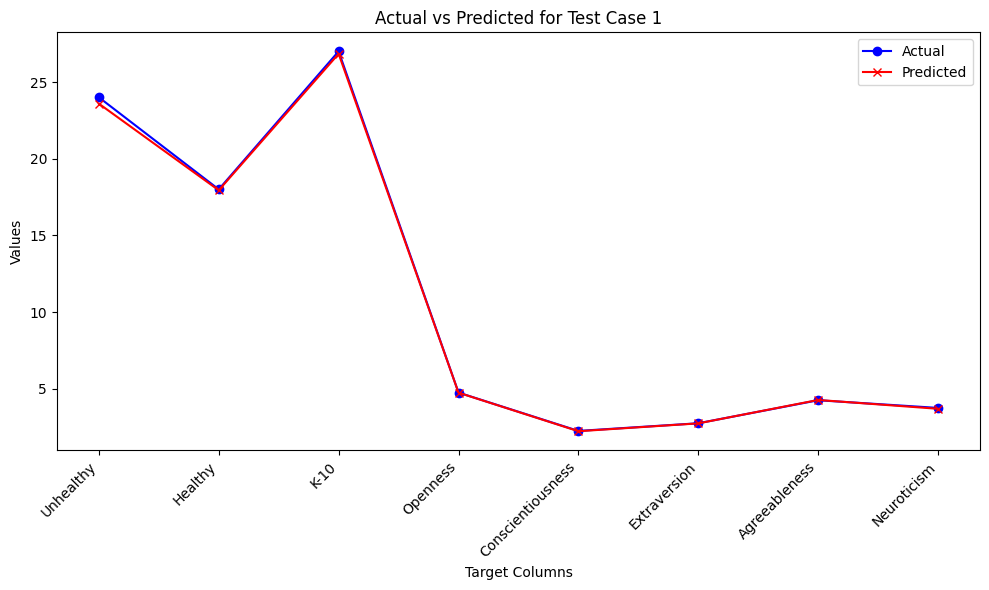

In [36]:
import matplotlib.pyplot as plt

index = 0

y_test_plot = y_test.iloc[index]
y_pred_plot = y_pred_df.iloc[index]

plt.figure(figsize=(10, 6))

# Plot actual values
plt.plot(target_columns, y_test_plot, marker='o', label='Actual', color='blue')

# Plot predicted values
plt.plot(target_columns, y_pred_plot, marker='x', label='Predicted', color='red')

plt.xlabel('Target Columns')
plt.ylabel('Values')
plt.title(f'Actual vs Predicted for Test Case {index + 1}')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability
plt.legend()

# Display 
plt.tight_layout()
plt.show()


In [37]:
import joblib

# Save the model to a file
joblib.dump(xgb_model, 'xgb_model.pkl')

['xgb_model.pkl']

In [38]:
import pandas as pd
import numpy as np
import joblib

# Load the encoders
label_encoder_gender = joblib.load('label_encoder_gender.pkl')
label_encoder_nationality = joblib.load('label_encoder_nationality.pkl')
label_encoder_music_training = joblib.load('label_encoder_music_training.pkl')
ordinal_encoder_education = joblib.load('ordinal_encoder_education.pkl')
ordinal_encoder_interest_music = joblib.load('ordinal_encoder_interest_music.pkl')
ordinal_encoder_background_music = joblib.load('ordinal_encoder_background_music.pkl')
bad_memories_encoder = joblib.load('bad_memories.pkl')
hide_music_encoder = joblib.load('hide_music.pkl')
music_relax_encoder = joblib.load('music_relax.pkl')
music_feel_worse_encoder = joblib.load('music_feel_worse.pkl')
feel_happier_encoder = joblib.load('feel_happier.pkl')
energy_getting_encoder = joblib.load('energy_getting.pkl')
listen_over_over_encoder = joblib.load('listen_over_over.pkl')
feel_bad_encoder = joblib.load('feel_bad.pkl')
connect_people_encoder = joblib.load('connect_people.pkl')
excuse_music_encoder = joblib.load('excuse_music.pkl')
stop_bad_memories_encoder = joblib.load('stop_bad_memories.pkl')
shouldnt_do_encoder = joblib.load('shouldnt_do.pkl')
tense_music_relax_encoder = joblib.load('tense_music_relax.pkl')
tired_out_encoder = joblib.load('ordinal_encoder_tired_out.pkl')
nervous_encoder = joblib.load('4weeks_often_nervous.pkl')
nervous_calmdown_encoder = joblib.load('4weeks_often_nervous_calmdown.pkl')
hopeless_encoder = joblib.load('4weeks_often_hopeless.pkl')
restless_encoder = joblib.load('4weeks_often_restless.pkl')
restless_notstill_encoder = joblib.load('4weeks_often_restless_notstill.pkl')
depressed_encoder = joblib.load('4weeks_often_depressed.pkl')
effort_encoder = joblib.load('4weeks_often_effort.pkl')
sad_encoder = joblib.load('4weeks_often_sad.pkl')
worthless_encoder = joblib.load('4weeks_often_worthless.pkl')
life_of_party_encoder = joblib.load('ordinal_encoder_life_of_party.pkl')
sympathize_encoder = joblib.load('sympathize_with_others.pkl')
chores_done_encoder = joblib.load('get_chores_done.pkl')
mood_swings_encoder = joblib.load('frequent_mood_swings.pkl')
imagination_encoder = joblib.load('vivid_imagination.pkl')
dont_talk_encoder = joblib.load('dont_talk_a_lot.pkl')
not_interested_encoder = joblib.load('not_interested_in_problems.pkl')
forget_place_encoder = joblib.load('forget_putting_things_back.pkl')
relaxed_encoder = joblib.load('relaxed_most_of_the_time.pkl')
not_interested_abstract_encoder = joblib.load('not_interested_in_abstract_ideas.pkl')
talk_to_parties_encoder = joblib.load('talk_to_people_at_parties.pkl')
feel_others_encoder = joblib.load('feel_others_emotions.pkl')
like_order_encoder = joblib.load('like_order.pkl')
get_upset_encoder = joblib.load('get_upset_easily.pkl')
difficulty_understanding_encoder = joblib.load('difficulty_understanding_abstract_ideas.pkl')
keep_background_encoder = joblib.load('keep_in_background.pkl')
not_interested_others_encoder = joblib.load('not_interested_in_others.pkl')
make_mess_encoder = joblib.load('make_mess_of_things.pkl')
seldom_blue_encoder = joblib.load('seldom_feel_blue.pkl')
no_imagination_encoder = joblib.load('not_good_imagination.pkl')
well_being_encoder = joblib.load('ordinal_encoder_well_being.pkl')
music_preference_encoder = joblib.load('label_encoder_music_preference.pkl')
music_low_encoder = joblib.load('label_encoder_music_low.pkl')

# Create a DataFrame to hold the data
data3=[]
data3 = pd.DataFrame()

# Gender
gender_options = ['Male', 'Female', 'Other']
data3['Gender'] = np.random.choice(gender_options, size=1)
data3['Gender'] = label_encoder_gender.transform(data3['Gender'])

# Age
data3['Age'] = np.random.randint(18, 65, size=1)  # Example age range

# Nationality
nationality_options = ['United States']
data3['Nationality'] = np.random.choice(nationality_options, size=1)
data3['Nationality'] = label_encoder_nationality.transform(data3['Nationality'])

# What is the highest level of education you have completed?
education_options = ["High School graduate", "Bachelor's degree", "Master's degree", "Professional degree"]
data3['What is the highest level of education you have completed? '] = np.random.choice(education_options, size=1)
data3['What is the highest level of education you have completed? '] = ordinal_encoder_education.transform(data3[['What is the highest level of education you have completed? ']])

# Your interest in music?
interest_music_options = ['Least bothered', 'Moderate', 'Enthusiastic']
data3['Your interest in music?'] = np.random.choice(interest_music_options, size=1)
data3['Your interest in music?'] = ordinal_encoder_interest_music.transform(data3[['Your interest in music?']])

# Have you had formal training or education related to music?
music_training_options = ['Yes', 'No']
data3['Have you had formal training or education related to music?'] = np.random.choice(music_training_options, size=1)
data3['Have you had formal training or education related to music?'] = label_encoder_music_training.transform(data3['Have you had formal training or education related to music?'])

# How many hours in a day do you listen to music?
data3['How many hours in a day do you listen to music?'] = np.random.randint(1, 12, size=1)


# Do you listen to music in the background while working?
background_music_order = ['Never', 'Rarely', 'Sometimes', 'Often', 'Always']
data3['Do you listen to music in the background while working? [Choice]'] = np.random.choice(background_music_order, size=1)
data3['Do you listen to music in the background while working? [Choice]'] = ordinal_encoder_background_music.transform(data3[['Do you listen to music in the background while working? [Choice]']])

# When I listen to music I get stuck in bad memories
bad_memories_order = ['Never', 'Rarely', 'Sometimes', 'Often', 'Always']
data3['When I listen to music I get stuck in bad memories [Choice]'] = np.random.choice(bad_memories_order, size=1)
data3['When I listen to music I get stuck in bad memories [Choice]'] = bad_memories_encoder.transform(data3[['When I listen to music I get stuck in bad memories [Choice]']])

# I hide in my music because nobody understands me, and it blocks people out
hide_music_order = ['Never', 'Rarely', 'Sometimes', 'Often', 'Always']
data3['I hide in my music because nobody understands me, and it blocks people out [Choice]'] = np.random.choice(hide_music_order, size=1)
data3['I hide in my music because nobody understands me, and it blocks people out [Choice]'] = hide_music_encoder.transform(data3[['I hide in my music because nobody understands me, and it blocks people out [Choice]']])

# Music helps me relax
music_relax_order = ['Never', 'Rarely', 'Sometimes', 'Often', 'Always']
data3['Music helps me relax [Choice]'] = np.random.choice(music_relax_order, size=1)
data3['Music helps me relax [Choice]'] = music_relax_encoder.transform(data3[['Music helps me relax [Choice]']])

# When I try to use music to feel better I actually end up feeling worse
music_feel_worse_order = ['Never', 'Rarely', 'Sometimes', 'Often', 'Always']
data3['When I try to use music to feel better I actually end up feeling worse [Choice]'] = np.random.choice(music_feel_worse_order, size=1)
data3['When I try to use music to feel better I actually end up feeling worse [Choice]'] = music_feel_worse_encoder.transform(data3[['When I try to use music to feel better I actually end up feeling worse [Choice]']])

# I feel happier after playing or listening to music
feel_happier_order = ['Never', 'Rarely', 'Sometimes', 'Often', 'Always']
data3['I feel happier after playing or listening to music [Choice]'] = np.random.choice(feel_happier_order, size=1)
data3['I feel happier after playing or listening to music [Choice]'] = feel_happier_encoder.transform(data3[['I feel happier after playing or listening to music [Choice]']])

# Music gives me the energy to get going
energy_getting_order = ['Never', 'Rarely', 'Sometimes', 'Often', 'Always']
data3['Music gives me the energy to get going [Choice]'] = np.random.choice(energy_getting_order, size=1)
data3['Music gives me the energy to get going [Choice]'] = energy_getting_encoder.transform(data3[['Music gives me the energy to get going [Choice]']])

# I like to listen to songs over and over even though it makes me feel worse
listen_over_over_order = ['Never', 'Rarely', 'Sometimes', 'Often', 'Always']
data3['I like to listen to songs over and over even though it makes me feel worse [Choice]'] = np.random.choice(listen_over_over_order, size=1)
data3['I like to listen to songs over and over even though it makes me feel worse [Choice]'] = listen_over_over_encoder.transform(data3[['I like to listen to songs over and over even though it makes me feel worse [Choice]']])

# Music makes me feel bad about who I am
feel_bad_order = ['Never', 'Rarely', 'Sometimes', 'Often', 'Always']
data3['Music makes me feel bad about who I am [Choice]'] = np.random.choice(feel_bad_order, size=1)
data3['Music makes me feel bad about who I am [Choice]'] = feel_bad_encoder.transform(data3[['Music makes me feel bad about who I am [Choice]']])

# Music helps me to connect with other people who are like me
connect_people_order = ['Never', 'Rarely', 'Sometimes', 'Often', 'Always']
data3['Music helps me to connect with other people who are like me [Choice]'] = np.random.choice(connect_people_order, size=1)
data3['Music helps me to connect with other people who are like me [Choice]'] = connect_people_encoder.transform(data3[['Music helps me to connect with other people who are like me [Choice]']])

# Music gives me an excuse not to face up to the real world
excuse_music_order = ['Never', 'Rarely', 'Sometimes', 'Often', 'Always']
data3['Music gives me an excuse not to face up to the real world [Choice]'] = np.random.choice(excuse_music_order, size=1)
data3['Music gives me an excuse not to face up to the real world [Choice]'] = excuse_music_encoder.transform(data3[['Music gives me an excuse not to face up to the real world [Choice]']])

# It can be hard to stop listening to music that connects me to bad memories
stop_bad_memories_order = ['Never', 'Rarely', 'Sometimes', 'Often', 'Always']
data3['It can be hard to stop listening to music that connects me to bad memories [Choice]'] = np.random.choice(stop_bad_memories_order, size=1)
data3['It can be hard to stop listening to music that connects me to bad memories [Choice]'] = stop_bad_memories_encoder.transform(data3[['It can be hard to stop listening to music that connects me to bad memories [Choice]']])

# Music leads me to do things I shouldn’t do
shouldnt_do_order = ['Never', 'Rarely', 'Sometimes', 'Often', 'Always']
data3['Music leads me to do things I shouldn’t do [Choice]'] = np.random.choice(shouldnt_do_order, size=1)
data3['Music leads me to do things I shouldn’t do [Choice]'] = shouldnt_do_encoder.transform(data3[['Music leads me to do things I shouldn’t do [Choice]']])

# When I’m feeling tense or tired in my body music helps me relax
tense_music_relax_order = ['Never', 'Rarely', 'Sometimes', 'Often', 'Always']
data3['When I’m feeling tense or tired in my body music helps me relax [Choice]'] = np.random.choice(tense_music_relax_order, size=1)
data3['When I’m feeling tense or tired in my body music helps me relax [Choice]'] = tense_music_relax_encoder.transform(data3[['When I’m feeling tense or tired in my body music helps me relax [Choice]']])

# In the past 4 weeks, how often did you feel tired out for no good reason?
tired_out_order = ['None of the time', 'A little of the time', 'Some of the time', 'Most of the time', 'All of the time']
data3['In the past 4 weeks, how often did you feel tired out for no good reason?  [Choice]'] = np.random.choice(tired_out_order, size=1)
data3['In the past 4 weeks, how often did you feel tired out for no good reason?  [Choice]'] = tired_out_encoder.transform(data3[['In the past 4 weeks, how often did you feel tired out for no good reason?  [Choice]']])

# In the past 4 weeks, how often did you feel nervous?
nervous_order = ['None of the time', 'A little of the time', 'Some of the time', 'Most of the time', 'All of the time']
data3['In the past 4 weeks, how often did you feel nervous? [Choice]'] = np.random.choice(nervous_order, size=1)
data3['In the past 4 weeks, how often did you feel nervous? [Choice]'] = nervous_encoder.transform(data3[['In the past 4 weeks, how often did you feel nervous? [Choice]']])

# In the past 4 weeks, how often did you feel so nervous that nothing could calm you down?
nervous_calmdown_order = ['None of the time', 'A little of the time', 'Some of the time', 'Most of the time', 'All of the time']
data3['In the past 4 weeks, how often did you feel so nervous that nothing could calm you down?     [Choice]'] = np.random.choice(nervous_calmdown_order, size=1)
data3['In the past 4 weeks, how often did you feel so nervous that nothing could calm you down?     [Choice]'] = nervous_calmdown_encoder.transform(data3[['In the past 4 weeks, how often did you feel so nervous that nothing could calm you down?     [Choice]']])

# In the past 4 weeks, how often did you feel hopeless?
hopeless_order = ['None of the time', 'A little of the time', 'Some of the time', 'Most of the time', 'All of the time']
data3['In the past 4 weeks, how often did you feel hopeless? [Choice]'] = np.random.choice(hopeless_order, size=1)
data3['In the past 4 weeks, how often did you feel hopeless? [Choice]'] = hopeless_encoder.transform(data3[['In the past 4 weeks, how often did you feel hopeless? [Choice]']])

# In the past 4 weeks, how often did you feel restless or fidgety?
restless_order = ['None of the time', 'A little of the time', 'Some of the time', 'Most of the time', 'All of the time']
data3['In the past 4 weeks, how often did you feel restless or fidgety?  [Choice]'] = np.random.choice(restless_order, size=1)
data3['In the past 4 weeks, how often did you feel restless or fidgety?  [Choice]'] = restless_encoder.transform(data3[['In the past 4 weeks, how often did you feel restless or fidgety?  [Choice]']])

# In the past 4 weeks, how often did you feel so restless you could not sit still?
restless_notstill_order = ['None of the time', 'A little of the time', 'Some of the time', 'Most of the time', 'All of the time']
data3['In the past 4 weeks, how often did you feel so restless you could not sit still?  [Choice]'] = np.random.choice(restless_notstill_order, size=1)
data3['In the past 4 weeks, how often did you feel so restless you could not sit still?  [Choice]'] = restless_notstill_encoder.transform(data3[['In the past 4 weeks, how often did you feel so restless you could not sit still?  [Choice]']])

# In the past 4 weeks, how often did you feel depressed?
depressed_order = ['None of the time', 'A little of the time', 'Some of the time', 'Most of the time', 'All of the time']
data3['In the past 4 weeks, how often did you feel depressed? [Choice]'] = np.random.choice(depressed_order, size=1)
data3['In the past 4 weeks, how often did you feel depressed? [Choice]'] = depressed_encoder.transform(data3[['In the past 4 weeks, how often did you feel depressed? [Choice]']])

# In the past 4 weeks, how often did you feel that everything was an effort?
effort_order = ['None of the time', 'A little of the time', 'Some of the time', 'Most of the time', 'All of the time']
data3['In the past 4 weeks, how often did you feel that everything was an effort?  [Choice]'] = np.random.choice(effort_order, size=1)
data3['In the past 4 weeks, how often did you feel that everything was an effort?  [Choice]'] = effort_encoder.transform(data3[['In the past 4 weeks, how often did you feel that everything was an effort?  [Choice]']])

# In the past 4 weeks, how often did you feel so sad that nothing could cheer you up?
sad_order = ['None of the time', 'A little of the time', 'Some of the time', 'Most of the time', 'All of the time']
data3['In the past 4 weeks, how often did you feel so sad that nothing could cheer you up? [Choice]'] = np.random.choice(sad_order, size=1)
data3['In the past 4 weeks, how often did you feel so sad that nothing could cheer you up? [Choice]'] = sad_encoder.transform(data3[['In the past 4 weeks, how often did you feel so sad that nothing could cheer you up? [Choice]']])

# In the past 4 weeks, how often did you feel worthless?
worthless_order = ['None of the time', 'A little of the time', 'Some of the time', 'Most of the time', 'All of the time']
data3['In the past 4 weeks, how often did you feel worthless? [Choice]'] = np.random.choice(worthless_order, size=1)
data3['In the past 4 weeks, how often did you feel worthless? [Choice]'] = worthless_encoder.transform(data3[['In the past 4 weeks, how often did you feel worthless? [Choice]']])

# Am the life of the party.
life_party_order = ['Strongly Disagree', 'Somewhat Disagree', 'Neither Agree nor Disagree', 'Somewhat Agree', 'Strongly Agree']
data3['Am the life of the party. [Choice]'] = np.random.choice(life_party_order, size=1)
data3['Am the life of the party. [Choice]'] = life_of_party_encoder.transform(data3[['Am the life of the party. [Choice]']])

# Sympathize with others’ feelings.
sympathize_order = ['Strongly Disagree', 'Somewhat Disagree', 'Neither Agree nor Disagree', 'Somewhat Agree', 'Strongly Agree']
data3['Sympathize with others’ feelings. [Choice]'] = np.random.choice(sympathize_order, size=1)
data3['Sympathize with others’ feelings. [Choice]'] = sympathize_encoder.transform(data3[['Sympathize with others’ feelings. [Choice]']])

# Get chores done right away.
chores_order = ['Strongly Disagree', 'Somewhat Disagree', 'Neither Agree nor Disagree', 'Somewhat Agree', 'Strongly Agree']
data3['Get chores done right away.  [Choice]'] = np.random.choice(chores_order, size=1)
data3['Get chores done right away.  [Choice]'] = chores_done_encoder.transform(data3[['Get chores done right away.  [Choice]']])

# Have frequent mood swings.
mood_swings_order = ['Strongly Disagree', 'Somewhat Disagree', 'Neither Agree nor Disagree', 'Somewhat Agree', 'Strongly Agree']
data3['Have frequent mood swings. [Choice]'] = np.random.choice(mood_swings_order, size=1)
data3['Have frequent mood swings. [Choice]'] = mood_swings_encoder.transform(data3[['Have frequent mood swings. [Choice]']])

# Have a vivid imagination.
vivid_imagination_order = ['Strongly Disagree', 'Somewhat Disagree', 'Neither Agree nor Disagree', 'Somewhat Agree', 'Strongly Agree']
data3['Have a vivid imagination. [Choice]'] = np.random.choice(vivid_imagination_order, size=1)
data3['Have a vivid imagination. [Choice]'] = imagination_encoder.transform(data3[['Have a vivid imagination. [Choice]']])

# Don’t talk a lot.
talk_order = ['Strongly Disagree', 'Somewhat Disagree', 'Neither Agree nor Disagree', 'Somewhat Agree', 'Strongly Agree']
data3['Don’t talk a lot. [Choice]'] = np.random.choice(talk_order, size=1)
data3['Don’t talk a lot. [Choice]'] = dont_talk_encoder.transform(data3[['Don’t talk a lot. [Choice]']])

# Am not interested in other people’s problems.
other_problems_order = ['Strongly Disagree', 'Somewhat Disagree', 'Neither Agree nor Disagree', 'Somewhat Agree', 'Strongly Agree']
data3['Am not interested in other people’s problems. [Choice]'] = np.random.choice(other_problems_order, size=1)
data3['Am not interested in other people’s problems. [Choice]'] = not_interested_encoder.transform(data3[['Am not interested in other people’s problems. [Choice]']])

# Often forget to put things back in their proper place.
forget_order = ['Strongly Disagree', 'Somewhat Disagree', 'Neither Agree nor Disagree', 'Somewhat Agree', 'Strongly Agree']
data3['Often forget to put things back in their proper place. [Choice]'] = np.random.choice(forget_order, size=1)
data3['Often forget to put things back in their proper place. [Choice]'] = forget_place_encoder.transform(data3[['Often forget to put things back in their proper place. [Choice]']])

# Am relaxed most of the time.
relaxed_order = ['Strongly Disagree', 'Somewhat Disagree', 'Neither Agree nor Disagree', 'Somewhat Agree', 'Strongly Agree']
data3['Am relaxed most of the time. [Choice]'] = np.random.choice(relaxed_order, size=1)
data3['Am relaxed most of the time. [Choice]'] = relaxed_encoder.transform(data3[['Am relaxed most of the time. [Choice]']])

# Am not interested in abstract ideas.
abstract_ideas_order = ['Strongly Disagree', 'Somewhat Disagree', 'Neither Agree nor Disagree', 'Somewhat Agree', 'Strongly Agree']
data3['Am not interested in abstract ideas. [Choice]'] = np.random.choice(abstract_ideas_order, size=1)
data3['Am not interested in abstract ideas. [Choice]'] = not_interested_abstract_encoder.transform(data3[['Am not interested in abstract ideas. [Choice]']])

# Talk to a lot of different people at parties.
talk_parties_order = ['Strongly Disagree', 'Somewhat Disagree', 'Neither Agree nor Disagree', 'Somewhat Agree', 'Strongly Agree']
data3['Talk to a lot of different people at parties. [Choice]'] = np.random.choice(talk_parties_order, size=1)
data3['Talk to a lot of different people at parties. [Choice]'] = talk_to_parties_encoder.transform(data3[['Talk to a lot of different people at parties. [Choice]']])

# Feel others’ emotions.
feel_emotions_order = ['Strongly Disagree', 'Somewhat Disagree', 'Neither Agree nor Disagree', 'Somewhat Agree', 'Strongly Agree']
data3['Feel others’ emotions. [Choice]'] = np.random.choice(feel_emotions_order, size=1)
data3['Feel others’ emotions. [Choice]'] = feel_others_encoder.transform(data3[['Feel others’ emotions. [Choice]']])

# Like order.
order_order = ['Strongly Disagree', 'Somewhat Disagree', 'Neither Agree nor Disagree', 'Somewhat Agree', 'Strongly Agree']
data3['Like order. [Choice]'] = np.random.choice(order_order, size=1)
data3['Like order. [Choice]'] = like_order_encoder.transform(data3[['Like order. [Choice]']])

# Get upset easily.
upset_order = ['Strongly Disagree', 'Somewhat Disagree', 'Neither Agree nor Disagree', 'Somewhat Agree', 'Strongly Agree']
data3['Get upset easily. [Choice]'] = np.random.choice(upset_order, size=1)
data3['Get upset easily. [Choice]'] = get_upset_encoder.transform(data3[['Get upset easily. [Choice]']])

# I Have difficulty understanding abstract ideas.
difficulty_order = ['Strongly Disagree', 'Somewhat Disagree', 'Neither Agree nor Disagree', 'Somewhat Agree', 'Strongly Agree']
data3['I Have difficulty understanding abstract ideas. [Choice]'] = np.random.choice(difficulty_order, size=1)
data3['I Have difficulty understanding abstract ideas. [Choice]'] = difficulty_understanding_encoder.transform(data3[['I Have difficulty understanding abstract ideas. [Choice]']])

# Keep in the background.
background_order = ['Strongly Disagree', 'Somewhat Disagree', 'Neither Agree nor Disagree', 'Somewhat Agree', 'Strongly Agree']
data3['Keep in the background. [Choice]'] = np.random.choice(background_order, size=1)
data3['Keep in the background. [Choice]'] = keep_background_encoder.transform(data3[['Keep in the background. [Choice]']])

# Am not really interested in others.
not_interested_order = ['Strongly Disagree', 'Somewhat Disagree', 'Neither Agree nor Disagree', 'Somewhat Agree', 'Strongly Agree']
data3['Am not really interested in others. [Choice]'] = np.random.choice(not_interested_order, size=1)
data3['Am not really interested in others. [Choice]'] = not_interested_others_encoder.transform(data3[['Am not really interested in others. [Choice]']])

# Make a mess of things.
mess_order = ['Strongly Disagree', 'Somewhat Disagree', 'Neither Agree nor Disagree', 'Somewhat Agree', 'Strongly Agree']
data3['Make a mess of things. [Choice]'] = np.random.choice(mess_order, size=1)
data3['Make a mess of things. [Choice]'] = make_mess_encoder.transform(data3[['Make a mess of things. [Choice]']])

# Seldom feel blue.
seldom_blue_order = ['Strongly Disagree', 'Somewhat Disagree', 'Neither Agree nor Disagree', 'Somewhat Agree', 'Strongly Agree']
data3['Seldom feel blue. [Choice]'] = np.random.choice(seldom_blue_order, size=1)
data3['Seldom feel blue. [Choice]'] = seldom_blue_encoder.transform(data3[['Seldom feel blue. [Choice]']])

# Do not have a good imagination.
no_imagination_order = ['Strongly Disagree', 'Somewhat Disagree', 'Neither Agree nor Disagree', 'Somewhat Agree', 'Strongly Agree']
data3['Do not have a good imagination. [Choice]'] = np.random.choice(no_imagination_order, size=1)
data3['Do not have a good imagination. [Choice]'] = no_imagination_encoder.transform(data3[['Do not have a good imagination. [Choice]']])


# How would you compare your well-being one year ago and now?
well_being_options = ['I feel more or less the same.', 'I feel better now', "Can't say", 'I feel worse now']
data3['How would you compare your well-being one year ago and now?'] = np.random.choice(well_being_options, size=1)
data3['How would you compare your well-being one year ago and now?'] = well_being_encoder.transform(data3[['How would you compare your well-being one year ago and now?']])


# What kind of music do you like to listen to the most?
music_preference_options = ['rock', 'pop']
data3['What kind of music do you like to listen to the most? '] = np.random.choice(music_preference_options, size=1)
data3['What kind of music do you like to listen to the most? '] = music_preference_encoder.transform(data3[['What kind of music do you like to listen to the most? ']])


# What kind of music do you like to listen to when you feel low?
music_low_options = ['rock', 'pop']
data3['What kind of music do you like to listen to when you feel low? '] = np.random.choice(music_low_options, size=1)
data3['What kind of music do you like to listen to when you feel low? '] = music_low_encoder.transform(data3[['What kind of music do you like to listen to when you feel low? ']])





C:\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [39]:
data3

,Gender,Age,Nationality,What is the highest level of education you have completed?,Your interest in music?,Have you had formal training or education related to music?,How many hours in a day do you listen to music?,Do you listen to music in the background while working? [Choice],When I listen to music I get stuck in bad memories [Choice],"I hide in my music because nobody understands me, and it blocks people out [Choice]",...,Get upset easily. [Choice],I Have difficulty understanding abstract ideas. [Choice],Keep in the background. [Choice],Am not really interested in others. [Choice],Make a mess of things. [Choice],Seldom feel blue. [Choice],Do not have a good imagination. [Choice],How would you compare your well-being one year ago and now?,What kind of music do you like to listen to the most?,What kind of music do you like to listen to when you feel low?
0,2,58,59,0.0,1.0,1,5,3.0,2.0,2.0,...,4.0,2.0,2.0,4.0,1.0,4.0,2.0,1.0,4,5


In [40]:
scaler = joblib.load('standard_scaler.pkl')
X_inputs = scaler.transform(data3)
print(X_inputs)

ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.


In [41]:
# Load the scaler
scaler = joblib.load('standard_scaler.pkl')

# Check the feature names used during fitting
fitted_columns = scaler.feature_names_in_

# Print the feature names
print(fitted_columns)


['Gender' 'Age'
 'What is the highest level of education you have completed? '
 'Nationality' 'Your interest in music?'
 'Have you had formal training or education related to music?'
 'How many hours in a day do you listen to music?'
 'What kind of music do you like to listen to the most? '
 'What kind of music do you like to listen to when you feel low? '
 'Do you listen to music in the background while working? [Choice]'
 'When I listen to music I get stuck in bad memories [Choice]'
 'I hide in my music because nobody understands me, and it blocks people out [Choice]'
 'Music helps me relax [Choice]'
 'When I try to use music to feel better I actually end up feeling worse [Choice]'
 'I feel happier after playing or listening to music [Choice]'
 'Music gives me the energy to get going [Choice]'
 'I like to listen to songs over and over even though it makes me feel worse [Choice]'
 'Music makes me feel bad about who I am [Choice]'
 'Music helps me to connect with other people who are l

In [42]:
# Load the scaler
scaler = joblib.load('standard_scaler.pkl')

# Get the feature names used during the scaler's fit process
scaler_columns = scaler.feature_names_in_

# Get the column names from data3
data3_columns = data3.columns

# Find the columns that are missing in data3 compared to the scaler
missing_in_data3 = [col for col in scaler_columns if col not in data3_columns]

# Find the extra columns in data3 that were not in the scaler
extra_in_data3 = [col for col in data3_columns if col not in scaler_columns]

# Print the results
if missing_in_data3:
    print(f"Columns in scaler but missing in data3: {missing_in_data3}")
else:
    print("No columns are missing in data3 compared to the scaler.")

if extra_in_data3:
    print(f"Extra columns in data3 not in scaler: {extra_in_data3}")
else:
    print("No extra columns in data3 compared to the scaler.")


No columns are missing in data3 compared to the scaler.
No extra columns in data3 compared to the scaler.


In [43]:
# Check the order of columns in data3 and the scaler
data3_columns = data3.columns.tolist()
scaler_columns = scaler.feature_names_in_.tolist()

# Initialize lists to hold mismatches
order_mismatch = []

# Compare the two lists
for i, col in enumerate(scaler_columns):
    if i < len(data3_columns):
        if col != data3_columns[i]:
            order_mismatch.append((i, col, data3_columns[i]))

# Print the results
if not order_mismatch:
    print("The columns are in the same order.")
else:
    print("Column order mismatch:")
    for index, scaler_col, data3_col in order_mismatch:
        print(f"Index {index}: Scaler column '{scaler_col}' does not match data3 column '{data3_col}'")


Column order mismatch:
Index 2: Scaler column 'What is the highest level of education you have completed? ' does not match data3 column 'Nationality'
Index 3: Scaler column 'Nationality' does not match data3 column 'What is the highest level of education you have completed? '
Index 7: Scaler column 'What kind of music do you like to listen to the most? ' does not match data3 column 'Do you listen to music in the background while working? [Choice]'
Index 8: Scaler column 'What kind of music do you like to listen to when you feel low? ' does not match data3 column 'When I listen to music I get stuck in bad memories [Choice]'
Index 9: Scaler column 'Do you listen to music in the background while working? [Choice]' does not match data3 column 'I hide in my music because nobody understands me, and it blocks people out [Choice]'
Index 10: Scaler column 'When I listen to music I get stuck in bad memories [Choice]' does not match data3 column 'Music helps me relax [Choice]'
Index 11: Scaler co

In [44]:
# Load the existing scaler
scaler = joblib.load('standard_scaler.pkl')

# Get the current feature names from the scaler and the column names from data3
scaler_columns = scaler.feature_names_in_.tolist()
data3_columns = data3.columns.tolist()

# Create a new list for the rearranged scaler feature names
rearranged_scaler_columns = [col for col in data3_columns if col in scaler_columns]

# Check if all data3 columns are in the scaler's columns
if len(rearranged_scaler_columns) != len(data3_columns):
    print("Warning: Not all columns in data3 are present in the scaler.")
    
# Rearranging the scaler's feature names to match the order of data3
scaler.feature_names_in_ = np.array(rearranged_scaler_columns)

# Saving the modified scaler with the new column order
joblib.dump(scaler, 'rearranged_standard_scaler.pkl')

print("Scaler's feature names rearranged and saved successfully.")


Scaler's feature names rearranged and saved successfully.


In [45]:
scaler = joblib.load('rearranged_standard_scaler.pkl')
X_inputs = scaler.transform(data3)
print(X_inputs)

[[ 2.77547458e+00  4.47060217e+00  6.57074064e+01 -1.89879509e+00
  -3.20510896e+00  1.20792835e+00  1.57079705e-01 -2.57839539e-01
  -5.33393240e-01 -9.97248580e-01  3.04151965e+00  2.40272455e+00
  -4.29723340e+00  4.31600969e+00  1.61879799e-02 -3.59129091e+00
   1.90421442e+00  5.35557838e+00  4.41970035e-01  2.78266352e+00
  -9.30274909e-01  9.44370949e-01  1.54441418e+00  1.33930300e-01
   1.20796989e+00  3.42419574e+00  2.36484225e+00  4.43195425e-01
   2.78253638e-01  3.38120237e-01 -6.46791391e-01  1.02914127e+00
   1.40757892e+00 -2.81430751e-01  9.62181940e-01  4.46380013e-01
   7.95722373e-01  7.13546500e-02  1.27752456e+00  1.32820337e+00
  -1.46902682e+00 -8.36485641e-01  1.27276896e+00 -3.49051474e-01
   1.23219971e+00 -5.91823770e-01  1.61517461e-01  3.38616095e+00
  -1.42912100e+00  2.47691959e+00  2.44177263e-01 -4.02070194e-01
   2.78565168e+00  4.12497944e+00]]


In [46]:
xgb_model = joblib.load('xgb_model.pkl')

# Make predictions using X_inputs
y_input = xgb_model.predict(X_inputs)

column_names = ['Unhealthy', 'Healthy', 'K-10', 'Openness', 'Conscientiousness', 
                'Extraversion', 'Agreeableness', 'Neuroticism']

predictions_df = pd.DataFrame(y_input.reshape(1, -1), columns=column_names)

print(predictions_df)

   Unhealthy    Healthy       K-10  Openness  Conscientiousness  Extraversion  \
0  22.651628  18.524292  32.378487  2.815079           3.534333      2.346861   

   Agreeableness  Neuroticism  
0       3.250996     3.834404  
